<a href="https://colab.research.google.com/github/a33211/Data-science-homeworks/blob/main/Hw2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Частина третя: Аналіз датасет c Kaggle.com
Необхідно виконати:

Прочитайте csv файл (використовуйте функцію read_csv)
- Виведіть перші п'ять рядків (використовується функція head)
- Виведіть розміри датасету (використовуйте атрибут shape)

Відповідь: Про скільки книг зберігає дані датасет?

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from google.colab import drive
# drive.mount('\content\drive\GOIT_DS_Course_data')

In [72]:
df = pd.read_csv('bestsellers with categories.csv')
#df.head(5)
df.shape

(550, 7)

**Про скільки книг зберігає дані датасет?**

Датасет зберігає данні про 550 книг

In [73]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# Первинне дослідження даних
1. Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)


In [74]:
df.isnull().sum()* 100 / len(df)

name           0.0
author         0.0
user_rating    0.0
reviews        0.0
price          0.0
year           0.0
genre          0.0
dtype: float64

**Чи є в якихось змінних пропуски?**

В змінних пропуски відсутні


2. Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)


In [75]:
print(df['genre'].unique())

['Non Fiction' 'Fiction']


**Які є унікальні жанри?**
Унікальні жандри - фантастика/не фантастика (Fiction/Non Fiction)

3. Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

array([[<Axes: title={'center': 'price'}>]], dtype=object)

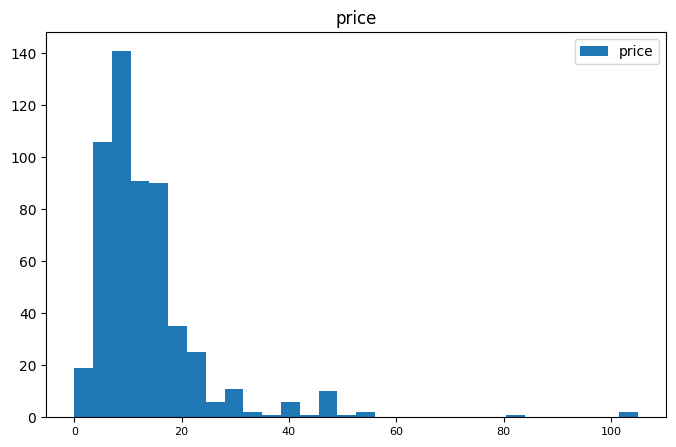

In [76]:
df.hist(column='price', grid = False, xlabelsize = 8, ylabelsize = 10, bins = 30, legend = True,figsize=[8, 5])


4.Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)


In [77]:
df.agg({'price':['max','min','mean','median']})

,price
max,105.0
min,0.0
mean,13.1
median,11.0


**Максимальна ціна?**

105$

**Мінімальна ціна?**

0$

**Середня ціна?**

13.1$

**Медіанна ціна?**

11.0%

# Пошук та сортування даних
Відповідь: Який рейтинг у датасеті найвищий? Відповідь:
Відповідь: Скільки книг мають такий рейтинг? Відповідь:
Відповідь: Яка книга має найбільше відгуків? Відповідь:
Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:
Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь:
Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь:
І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
Відповідь: Яка книга остання у відсортованому списку? Відповідь:

In [78]:
agg = df.agg({'user_rating':['max']})
#print(df.filter(agg))
max_agg_query = df.loc[df['user_rating'] == 4.9]
max_agg_query.shape


(52, 7)

In [79]:
df.loc[df['reviews'].idxmax()]
#df[df['reviews']==df['reviews'].max()]

name           Where the Crawdads Sing
author                     Delia Owens
user_rating                        4.8
reviews                          87841
price                               15
year                              2019
genre                          Fiction
Name: 534, dtype: object

In [ ]:
#df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
filt = df['year']==2019
df.loc[filt].sort_values('price', ascending = False)




In [162]:
filt = df.loc[(df['genre']=='Fiction')&(df['year'] ==2010)]
print(filt.shape)

(20, 7)


- **Який рейтинг у датасеті найвищий?** 

Відповідь: 4.9
- **Скільки книг мають такий рейтинг?**

 Відповідь: 52
- Яка книга має найбільше відгуків? 

Відповідь: Where the Crawdads Sing by Delia Owens
- **- З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?** 

Відповідь:Player's Handbook (Dungeons & Dragons) by Wizards RPG Team
- ***Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? ***

Відповідь: 20
- Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь:
- І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
- Відповідь: Яка книга остання у відсортованому списку? Відповідь: